In [1]:
from colradlumo_library import * 

adf04_path = '/Users/leomulholland/TeIII_collection/TeIII_gamma/adf04/TeIII_LPM_QUB.adf04'
dens_cm_3 = 1.e6 
temp = 0.17 
mass_number_te_iii = 127.6 #nuclear units

t = 10.5
Hotokezaka_density = 1e7 * (9.5/t)**3
dens_cm_3 = Hotokezaka_density

In [2]:
te_i_lumo_rmatrix_1e6_025 = colradlumo_calc('/Users/leomulholland/TeI_kappa/omegafiles/adf04/adf04',dens_cm_3,temp,atomic_mass_number=mass_number_te_iii)
te_ii_lumo_rmatrix_1e6_025 = colradlumo_calc('/Users/leomulholland/TeII_collection/TeII_epsilon/adas/adf04',dens_cm_3,temp,atomic_mass_number=mass_number_te_iii)
te_iii_lumo_rmatrix_1e6_025 = colradlumo_calc(adf04_path,dens_cm_3,temp,atomic_mass_number=mass_number_te_iii)

No ionization in the input file ECIP can be made
ECIP was not previously calculated, calculating now from inside 'suppliment_with_ecip'
adf04 file specifies no ionization rates but you requested ECIP, the adf04 file creatormost likely forgot about specify this (looking at you R-matrix people). Blindly creatingECIP rates for every transition, you don't want this specify in the file which levelsshould and should not have ionization rates.
ColRadPy cpu time (sec) -    0.08
No ionization in the input file ECIP can be made
ECIP was not previously calculated, calculating now from inside 'suppliment_with_ecip'
adf04 file specifies no ionization rates but you requested ECIP, the adf04 file creatormost likely forgot about specify this (looking at you R-matrix people). Blindly creatingECIP rates for every transition, you don't want this specify in the file which levelsshould and should not have ionization rates.
ColRadPy cpu time (sec) -    0.79
No ionization in the input file ECIP can be made
E

In [3]:
#Hotokezaka+23 mnras
ion_frac_te_i   = 0.25 
ion_frac_te_ii  = 0.40 
ion_frac_te_iii = 0.25 

In [23]:
mass_te_total = 1.7e-2 #this is alot

In [24]:
mass_te_i    = ion_frac_te_i   * mass_te_total
mass_te_ii   = ion_frac_te_ii  * mass_te_total
mass_te_iii  = ion_frac_te_iii * mass_te_total

In [25]:
print('Masses: ')
print('M Te I   = {:6.4f} M_o '.format(mass_te_i  ))
print('M Te II  = {:6.4f} M_o '.format(mass_te_ii ))
print('M Te III = {:6.4f} M_o '.format(mass_te_iii))

Masses: 
M Te I   = 0.0043 M_o 
M Te II  = 0.0068 M_o 
M Te III = 0.0043 M_o 


In [26]:

te_iii_lumo_rmatrix_1e6_025.scale_lumo_by_ion_mass(mass_of_ion_solar_units=mass_te_i)
te_ii_lumo_rmatrix_1e6_025.scale_lumo_by_ion_mass(mass_of_ion_solar_units=mass_te_ii)
te_i_lumo_rmatrix_1e6_025.scale_lumo_by_ion_mass(mass_of_ion_solar_units=mass_te_iii)


In [27]:
te_iii_lumo_rmatrix_1e6_025.predict_mass_for_requested_lumo_wl(2101,2.07e39)

Requesting L = 2.07000E+39 ph/s for spectral line λ =   2101.0000 nm
Closest wavelength found: λ  =   2102.0769 nm
Luminosity in one solar mass: 6.91239E+41 ergs/s , 7.30536E+53 ph/s
Require ion-mass of      0.0030 M_solar for requested luminosity. 


In [28]:
#te_iii_lumo_rmatrix_1e6_025.display_requested_lines_array([2101.0],100)

In [29]:
#te_ii_lumo_rmatrix_1e6_025.display_requested_lines_array([1000.0],100)

In [30]:
#te_i_lumo_rmatrix_1e6_025.display_requested_lines_array([1000.0],200)

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 8})
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})


In [32]:
wavelength_range = np.linspace(100,5000,200)
beta = 0.07

In [33]:
broadened_spec_r_matix_iii = te_iii_lumo_rmatrix_1e6_025.line_broadening_lumo_density(beta,wavelength_range)
broadened_spec_r_matix_ii = te_ii_lumo_rmatrix_1e6_025.line_broadening_lumo_density(beta,wavelength_range)
broadened_spec_r_matix_i = te_i_lumo_rmatrix_1e6_025.line_broadening_lumo_density(beta,wavelength_range)


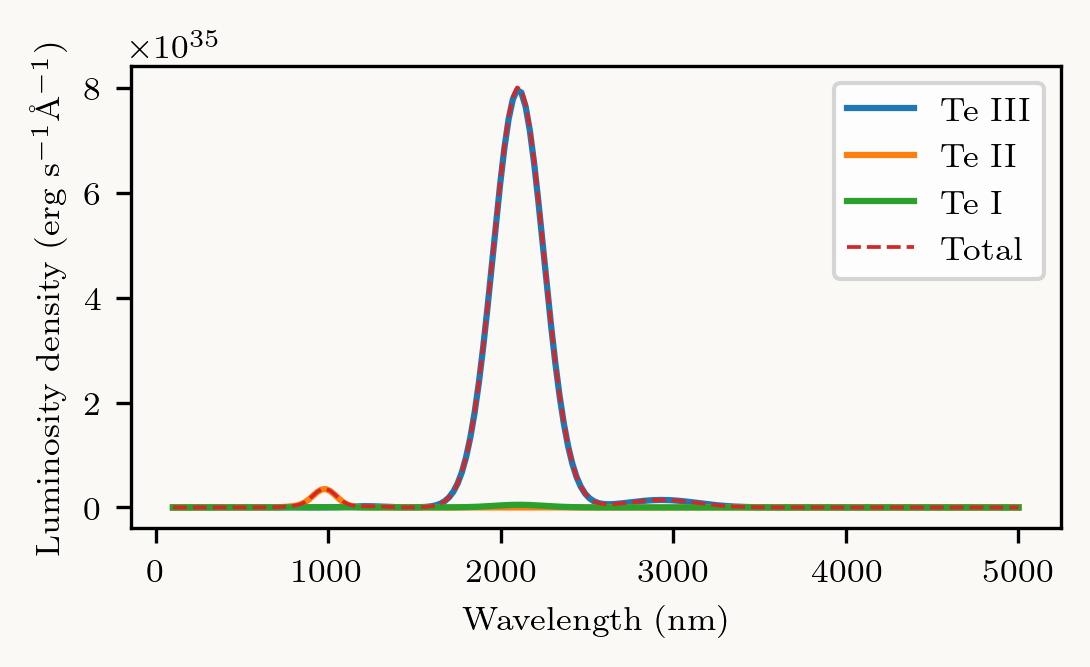

In [34]:
fig, ax = plt.subplots(1,1,figsize=(12/3,6/3),dpi=300)
#ax.axis('off')
ax.set_facecolor('#FAF9F6')
fig.set_facecolor('#FAF9F6')

ax.plot(wavelength_range,broadened_spec_r_matix_iii,label = 'Te III')
ax.plot(wavelength_range,broadened_spec_r_matix_ii,label = 'Te II')
ax.plot(wavelength_range,broadened_spec_r_matix_i,label = 'Te I')
total = broadened_spec_r_matix_i+broadened_spec_r_matix_ii+broadened_spec_r_matix_iii
ax.plot(wavelength_range,total,'--',linewidth=0.9,label = 'Total')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Luminosity density $(\rm{erg} \hspace{1mm} s^{-1} Å^{-1})$')

plt.legend()


In [35]:
total_lumo = trap(wavelength_range,total)

print("Total luminosity in broadened spec is: {:6.3e} erg/s.".format(total_lumo))

Total luminosity in broadened spec is: 3.100e+38 erg/s.


In [36]:
requested_lines = te_iii_lumo_rmatrix_1e6_025.select_strongest_n_lines(10)
requested_lines.display()

----------------------------------------------------------------------------------------------------------------------------------------
wlvac(nm),  transition,     E_j (cm-1),         Level j,     E_i (cm-1),        Level i, A_ij(s^-1), pec cm^3/s,   L (ph/s),  L (erg/s)
----------------------------------------------------------------------------------------------------------------------------------------
  2102.08,      1 -  2,          0.000,    5p2(3P)  0.0,       4757.200,   5p2(3P)  1.0,   1.83E+00,   1.06E-08,   3.10E+51,   2.94E+39
  2932.72,      2 -  3,       4757.200,    5p2(3P)  1.0,       8167.000,   5p2(3P)  2.0,   4.68E-01,   3.70E-10,   1.08E+50,   7.35E+37
  1224.44,      1 -  3,          0.000,    5p2(3P)  0.0,       8167.000,   5p2(3P)  2.0,   1.37E-02,   1.08E-11,   3.17E+48,   5.15E+36
   793.49,      2 -  4,       4757.200,    5p2(3P)  1.0,      17359.800,   5p2(1D)  2.0,   3.34E+00,   1.06E-12,   3.12E+47,   7.82E+35
  1087.81,      3 -  4,       8167.000,    5p2

In [37]:
requested_lines = te_ii_lumo_rmatrix_1e6_025.select_strongest_n_lines(10)
requested_lines.display()

----------------------------------------------------------------------------------------------------------------------------------------
wlvac(nm),  transition,     E_j (cm-1),         Level j,     E_i (cm-1),        Level i, A_ij(s^-1), pec cm^3/s,   L (ph/s),  L (erg/s)
----------------------------------------------------------------------------------------------------------------------------------------
   978.25,      1 -  2,          0.000,  5s25p3(4S)  1.5,      10222.385, 5s25p3(2D)  1.5,   1.72E+00,   6.34E-11,   2.97E+49,   6.04E+37
   805.03,      1 -  3,          0.000,  5s25p3(4S)  1.5,      12421.854, 5s25p3(2D)  2.5,   1.29E-01,   1.82E-12,   8.52E+47,   2.10E+36
  4546.55,      2 -  3,      10222.385,  5s25p3(2D)  1.5,      12421.854, 5s25p3(2D)  2.5,   9.27E-02,   1.31E-12,   6.12E+47,   2.68E+35
   486.70,      1 -  4,          0.000,  5s25p3(4S)  1.5,      20546.591, 5s25p3(2P)  0.5,   6.55E+00,   1.87E-14,   8.77E+45,   3.58E+34
   968.60,      2 -  4,      10222.385

In [38]:
requested_lines = te_i_lumo_rmatrix_1e6_025.select_strongest_n_lines(10)
requested_lines.display()

----------------------------------------------------------------------------------------------------------------------------------------
wlvac(nm),  transition,     E_j (cm-1),         Level j,     E_i (cm-1),        Level i, A_ij(s^-1), pec cm^3/s,   L (ph/s),  L (erg/s)
----------------------------------------------------------------------------------------------------------------------------------------
  2104.95,      1 -  3,          0.000,    5p4(3P)  2.0,       4750.710,   5p4(3P)  1.0,   2.30E+00,   6.04E-11,   1.77E+49,   1.67E+37
  2124.72,      1 -  2,          0.000,    5p4(3P)  2.0,       4706.500,   5p4(3P)  0.0,   1.53E-02,   7.39E-12,   2.17E+48,   2.03E+36
   947.16,      1 -  4,          0.000,    5p4(3P)  2.0,      10557.880,   5p4(1D)  2.0,   2.25E+00,   8.65E-13,   2.54E+47,   5.32E+35
  1722.01,      3 -  4,       4750.710,    5p4(3P)  1.0,      10557.880,   5p4(1D)  2.0,   1.29E-01,   4.96E-14,   1.45E+46,   1.68E+34
  1709.00,      2 -  4,       4706.500,    5p4

In [39]:
f = np.loadtxt('measured_spec/AT2017gfo_ENGRAVE_v1.0_XSHOOTER_MJD-57993.000_Phase+10.40d_deredz.dat')
parsec_cm = 3.086e+18

d_Mpc = 40 
d_cm = d_Mpc * 1e6 * parsec_cm
d_cm_squared = d_cm*d_cm

wl_ang = f[:,0]
wl_mic = f[:,0]*1e-4

flux = f[:,1]
lumo_ergs_s_ang = flux *4*np.pi*d_cm_squared


In [40]:
lower_bound = 1.90
upper_bound =  2.15
isolated_wl = wl_mic[(wl_mic > lower_bound) & (wl_mic < upper_bound) ] 
isolated_lumo = lumo_ergs_s_ang[(wl_mic > lower_bound) & (wl_mic < upper_bound) ]
trap(isolated_wl*10_000,isolated_lumo-0.8e36)

1.4892116795189286e+39

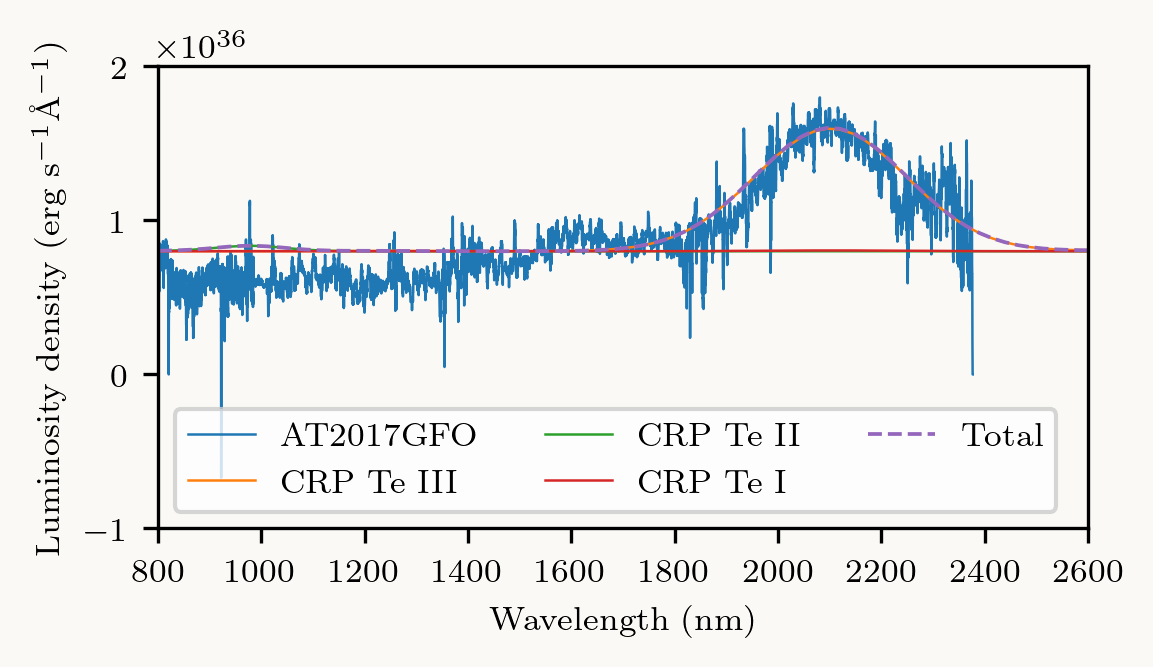

In [45]:
fig, ax = plt.subplots(1,1,figsize=(12/3,6/3),dpi=300)
#ax.axis('off')

plt.xlim([800,2600])
plt.ylim([-1e36,2e36])

ax.set_facecolor('#FAF9F6')
fig.set_facecolor('#FAF9F6')
ax.plot(wl_mic*1000,lumo_ergs_s_ang,label='AT2017GFO',linewidth=0.6)

ax.plot(wavelength_range,broadened_spec_r_matix_iii+0.8E36,label = 'CRP Te III',linewidth=0.6)
ax.plot(wavelength_range,broadened_spec_r_matix_ii +0.8E36,label = 'CRP Te II' ,linewidth=0.6)
ax.plot(wavelength_range,broadened_spec_r_matix_i  +0.8E36,label = 'CRP Te I'  ,linewidth=0.6)
total = broadened_spec_r_matix_i+broadened_spec_r_matix_ii+broadened_spec_r_matix_iii+0.8E36
ax.plot(wavelength_range,total,'--',linewidth=0.9,label = 'Total')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Luminosity density $(\rm{erg} \hspace{1mm} s^{-1} Å^{-1})$')

plt.legend(ncol=3)
